In [24]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import r2_score as r2, accuracy_score
%matplotlib inline

In [90]:
matplotlib.rcParams.update({'font.size': 14})

### Загрузка данных и анализ

In [2]:
train_df = pd.read_csv('train.csv')

In [4]:
train_df.shape

(10000, 20)

In [5]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [21]:
print(train_df['Ecology_3'].value_counts())
print(train_df['Ecology_2'].value_counts())
print(train_df['Shops_2'].value_counts())

B    9725
A     275
Name: Ecology_3, dtype: int64
B    9903
A      97
Name: Ecology_2, dtype: int64
B    9175
A     825
Name: Shops_2, dtype: int64


#Заменяем значения на цифровые для столбцов `Ecology_2`, `Ecology_3` и `Shops_2`

In [22]:
train_df.replace({'Ecology_2': {'A':0, 'B':1} ,'Ecology_3': {'A':0, 'B':1}, 'Shops_2': {'A':0, 'B':1}}, inplace = True)

In [25]:
X_train, X_test,y_train,y_test = train_test_split(train_df.drop(['Id','LifeSquare', 'Healthcare_1', 'Price'], axis = 'columns'), 
                                                  train_df['Price'], test_size = 0.2, random_state=22)

Модель RFR на данных без столбцов с пропусками из X_train

In [29]:
model_RFR_base = RandomForestRegressor(max_depth=15, n_estimators=200, random_state=42)
model_RFR_base.fit(X_train,y_train)
base_predict = model_RFR_base.predict(X_test)
r2(y_test, base_predict)

0.7174707537662912

Модель RFR на данных без столбцов с пропусками для всех данных

In [32]:
model_RFR = RandomForestRegressor(max_depth=15, n_estimators=200, random_state=55)
model_RFR.fit(train_df.drop(['Id','LifeSquare', 'Healthcare_1', 'Price'], axis = 'columns'), train_df['Price'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

In [33]:
# важность признаков
importance = pd.DataFrame()
importance['name'] = train_df.drop(['Id','LifeSquare', 'Healthcare_1', 'Price'], axis = 'columns').columns
importance['values'] = model_RFR_base.feature_importances_
importance.sort_values('values', ascending = False)

,name,values
2,Square,0.406894
10,Social_1,0.103454
11,Social_2,0.098842
1,Rooms,0.085509
12,Social_3,0.059149
0,DistrictId,0.051148
7,Ecology_1,0.045707
6,HouseYear,0.038957
4,Floor,0.028833
3,KitchenSquare,0.028028


In [34]:
test_df = pd.read_csv('test.csv')

In [35]:
test_df.replace({'Ecology_2': {'A':0, 'B':1} ,'Ecology_3': {'A':0, 'B':1}, 'Shops_2': {'A':0, 'B':1}}, inplace = True)

In [36]:
test_df['Price'] = model_RFR.predict(test_df.drop(['Id','LifeSquare', 'Healthcare_1'], axis = 'columns'))

In [37]:
test_df[['Id', 'Price']].to_csv('first_predict.csv', index = False)

## Анализ и обработка данных

In [38]:
#Ищем Na
train_df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

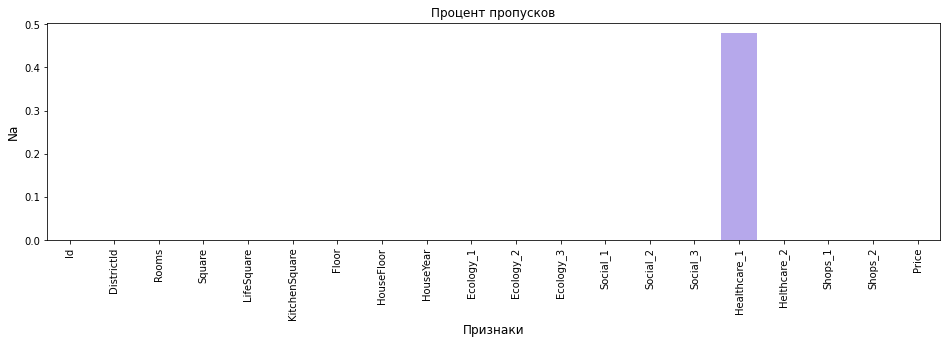

In [54]:
nan_df = (train_df.isna().sum() / train_df.shape[0]).reset_index()
nan_df.columns=['feature', 'nan_percent']
plt.figure(figsize=(16,4))
sns.barplot(nan_df['feature'], nan_df['nan_percent'])
plt.title('Процент пропусков')
plt.ylabel('Na', fontsize=12)
plt.xlabel('Признаки', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [52]:
def fill_LifeSquare(train_df):
    train_df.loc[(train_df['Square'] < train_df['LifeSquare']) | (train_df['LifeSquare'].isna()), 'LifeSquare'] = \
    (train_df.loc[(train_df['Square'] < train_df['LifeSquare']) | (train_df['LifeSquare'].isna()), 'Square'] - \
    train_df.loc[(train_df['Square'] < train_df['LifeSquare']) | (train_df['LifeSquare'].isna()), 'KitchenSquare'])*0.75
    return train_df

In [53]:
train_df = fill_LifeSquare(train_df)

In [59]:
train_df['Rooms'].value_counts()

2.0

In [57]:
#заполняем комнаты. Я посчитал что правильнее будет то что больше 5 поставить как медиану, и с нулем комнат приравнять к 1
def fill_rooms(train_df):
    train_df.loc[(train_df['Rooms'] > 5), 'Rooms'] = train_df['Rooms'].median()
    train_df.loc[(train_df['Rooms'] == 0), 'Rooms'] = 1
    return train_df

In [58]:
train_df = fill_rooms(train_df)

In [86]:
train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor']

Series([], Name: HouseFloor, dtype: float64)

In [84]:
# заменяем HouseFloor
def fill_HouseFloor(train_df):
    #ставим HouseFloor равный Floor, если этаж квартиры больше этажа дома
    train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'HouseFloor'] = train_df.loc[train_df['Floor'] > train_df['HouseFloor'], 'Floor']
    #ставим HouseFloor равный медиане, если этажей больше 90
    train_df.loc[train_df['HouseFloor'] > 90, 'HouseFloor'] = train_df['HouseFloor'].median()
    return train_df

train_df = fill_HouseFloor(train_df)

In [87]:
train_df[train_df['HouseYear'] >= 2021]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,1,1,30,6141,10,262.0,3,6,1,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,1,1,25,4756,16,2857.0,5,8,1,243028.603096


In [88]:
train_df.loc[train_df['HouseYear'] == 20052011,'HouseYear' ] = 2005
train_df.loc[train_df['HouseYear'] == 4968,'HouseYear' ] = 1968

In [96]:
train_df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,NaN,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,6.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,NaN,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,35.204256,1.0,12,16.0,2015,0.072158,1,1,2,629,1,NaN,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


## Создание модели

name     value
2          Square  0.406983
11       Social_1  0.112200
12       Social_2  0.088918
1           Rooms  0.071777
13       Social_3  0.060516
0      DistrictId  0.045917
8       Ecology_1  0.043759
7       HouseYear  0.033836
3      LifeSquare  0.031780
6      HouseFloor  0.026802
5           Floor  0.024300
4   KitchenSquare  0.023914
15        Shops_1  0.019316
14    Helthcare_2  0.007995
16        Shops_2  0.000780
9       Ecology_2  0.000661
10      Ecology_3  0.000547
[0.7222636814475261, 0.7258212780602669, 0.7237347134402787, 0.7229955856637111]


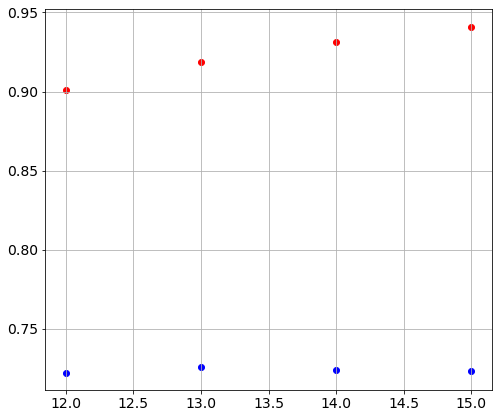

In [98]:
# Со всеми признаками
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 7

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Id','Price','Healthcare_1'], axis = 'columns') , train_df['Price'], test_size = 0.25, random_state = 33 )

r2_train = []
r2_test = []
max_depth = list(range(12,16))
for i in max_depth:
    mod1 = RandomForestRegressor(max_depth=i, n_estimators=230)
    mod1.fit(X_train,y_train)
    pr_train = mod1.predict(X_train)
    pr_test = mod1.predict(X_test)
    r2_train.append(r2(y_train, pr_train))
    r2_test.append(r2(y_test, pr_test))
    
imp = pd.DataFrame()
imp['name'] = X_train.columns
imp['value'] = mod1.feature_importances_
print(imp.sort_values('value' , ascending = False))
print(r2_test)
plt.scatter(max_depth, r2_train, c ='r')
plt.scatter(max_depth, r2_test, c = 'b')
plt.grid(True)

name     value
2       Square  0.413033
8     Social_1  0.112455
9     Social_2  0.096643
1        Rooms  0.072454
10    Social_3  0.065633
0   DistrictId  0.058514
7    Ecology_1  0.046508
6    HouseYear  0.038679
3   LifeSquare  0.037460
5   HouseFloor  0.030897
4        Floor  0.027723
[0.728640893567297, 0.7283742976280786, 0.7310181259051338, 0.7316987301296696]


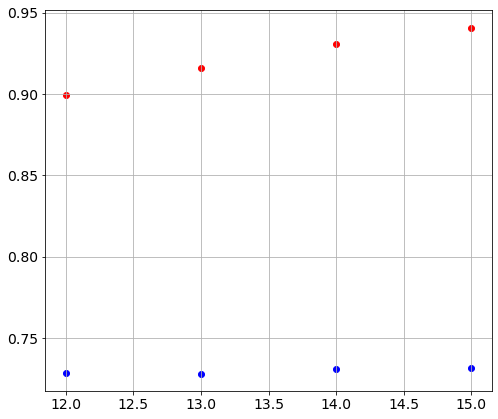

In [119]:
# С удалением признаков
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 7

X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['Id','Price','Healthcare_1','Ecology_3','Ecology_2','Shops_2','Helthcare_2','Shops_1','KitchenSquare'], axis = 'columns') , train_df['Price'], test_size = 0.25, random_state = 30 )

r2_train = []
r2_test = []
max_depth = list(range(12,16))
for i in max_depth:
    mod1 = RandomForestRegressor(max_depth=i, n_estimators=280)
    mod1.fit(X_train,y_train)
    pr_train = mod1.predict(X_train)
    pr_test = mod1.predict(X_test)
    r2_train.append(r2(y_train, pr_train))
    r2_test.append(r2(y_test, pr_test))
    
imp = pd.DataFrame()
imp['name'] = X_train.columns
imp['value'] = mod1.feature_importances_
print(imp.sort_values('value' , ascending = False))
print(r2_test)
plt.scatter(max_depth, r2_train, c ='r')
plt.scatter(max_depth, r2_test, c = 'b')
plt.grid(True)

### Обработка тестового сета


In [111]:
test_df = fill_LifeSquare(test_df)

In [112]:
test_df = fill_HouseFloor(test_df)
test_df = fill_rooms(test_df)

In [113]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1,161688.518310
1,15856,74,2.0,69.263183,51.197388,1.0,6,6.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1,223207.960883
2,5480,190,1.0,13.597819,1.198364,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,201699.454156
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1,340680.832670
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0,142791.050441


### Финальная модель

In [120]:
model_final = RandomForestRegressor(max_depth=15, n_estimators=280)
model_final.fit(train_df.drop(['Id','Price','Healthcare_1','Ecology_3','Ecology_2','Shops_2','Helthcare_2','Shops_1','KitchenSquare'], axis = 1) , train_df['Price'] )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=280, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [123]:
test_df['Price'] = model_final.predict(test_df.drop(['Id','Price','Healthcare_1','Ecology_3','Ecology_2','Shops_2','Helthcare_2','Shops_1','KitchenSquare'], axis = 1))

In [124]:
test_df[['Id', 'Price']].to_csv('RFR_predict_after_clean.csv', index = False)